# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('pd_speech_features.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


In [4]:
# Number of rows and columns
df.shape

(757, 755)

In [5]:
# Set the first row as header and drop the first row
df.columns = df.iloc[0]
df = df.drop(df.index[0])

In [6]:
# Reset the index for a clean structure
df.reset_index(drop=True, inplace=True)

# Explore the dataset

In [7]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
4,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [8]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', name=0, length=755)

In [9]:
# Check the structure and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: object(755)
memory usage: 4.4+ MB
None


In [10]:
# Get summary statistics for numerical columns
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
unique,252,2,740,745,748,315,319,755,646,358,...,749,755,752,753,749,752,753,753,754,2
top,0,1,0.82273,0.72248,0.62128,237,236,0.006004477,7.17E-05,0.00076,...,1.7726,4.0251,2.8454,4.2105,2.6829,3.1144,12.595,4.2391,3.2941,1
freq,3,390,3,2,2,9,8,2,3,9,...,2,2,2,2,2,2,2,2,2,564


In [11]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(missing_values)

0


**Visualize Key Features**

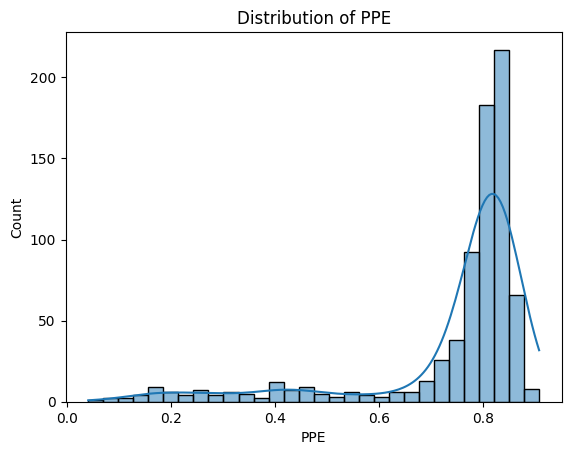

In [12]:
#Visualize distribution of a specific column (e.g., 'PPE')
sns.histplot(df['PPE'].astype(float), bins=30, kde=True)
plt.title('Distribution of PPE')
plt.show()

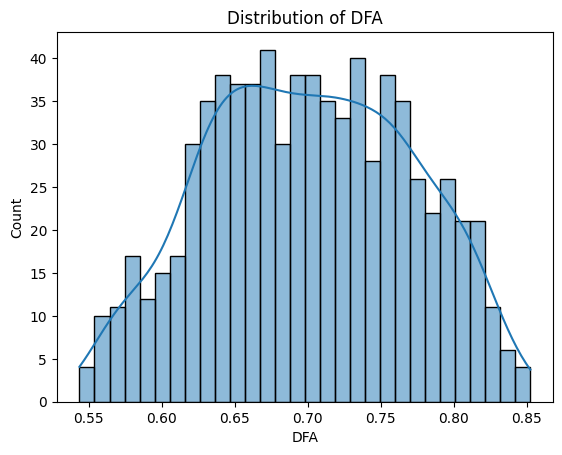

In [13]:
#Visualize distribution of a specific column (e.g., 'DFA')
sns.histplot(df['DFA'].astype(float), bins=30, kde=True)
plt.title('Distribution of DFA')
plt.show()

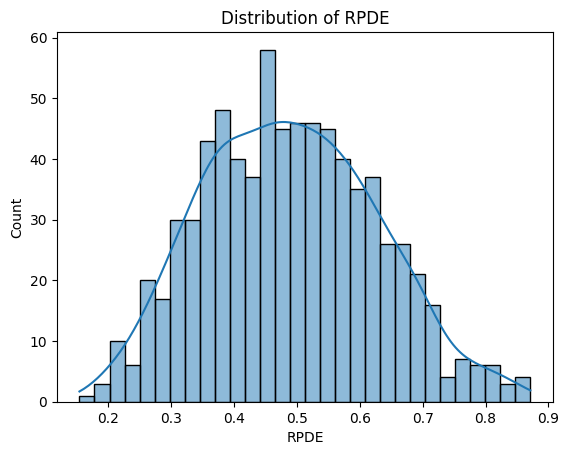

In [14]:
#Visualize distribution of a specific column (e.g., 'RPDE')
sns.histplot(df['RPDE'].astype(float), bins=30, kde=True)
plt.title('Distribution of RPDE')
plt.show()

**Target variable distribution**

class
1    564
0    192
Name: count, dtype: int64


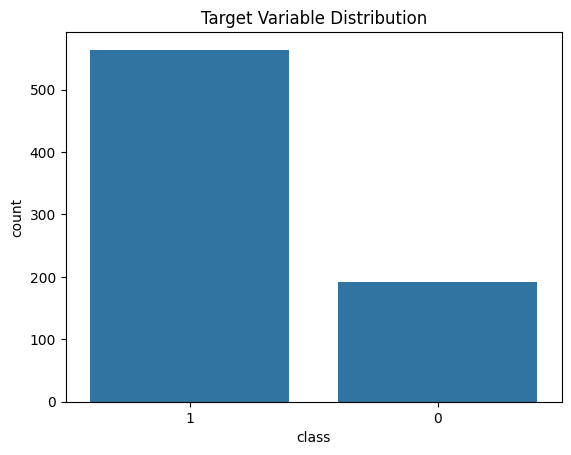

In [15]:
# Check the distribution of the target variable (e.g., 'class')
target_distribution = df['class'].value_counts()
print(target_distribution)

# Visualize the target variable distribution
sns.countplot(x='class', data=df)
plt.title('Target Variable Distribution')
plt.show()

* 1 = "Parkinson's disease", 0 = "Healthy"*

**Analyze the target column**

In [16]:
# Assuming 'class' is the target column
print(df['class'].value_counts())

class
1    564
0    192
Name: count, dtype: int64


# Outlier Detection

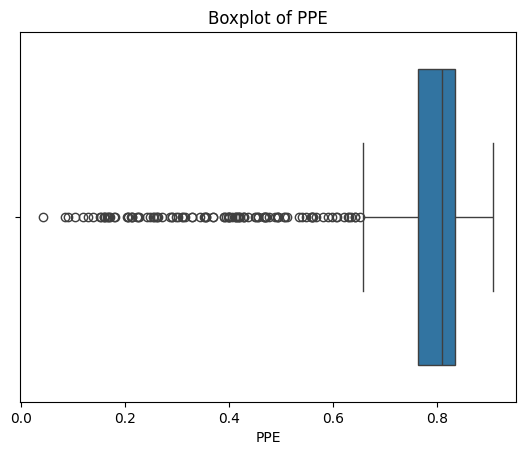

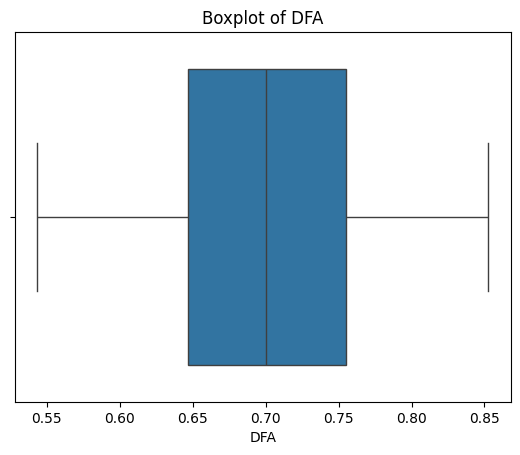

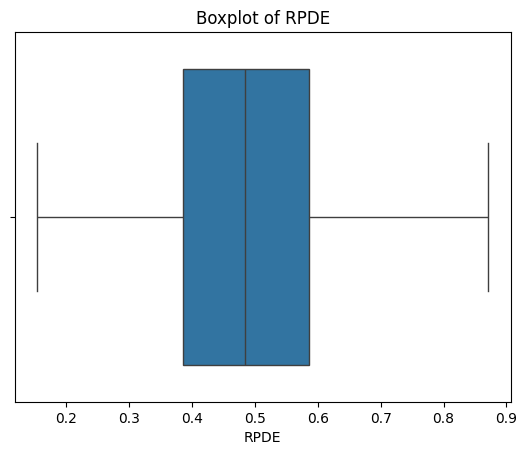

In [17]:
# Loop through multiple columns and create boxplots for each
numeric_columns = ['PPE', 'DFA', 'RPDE']  # Replace with your relevant numerical columns

for column in numeric_columns:
    sns.boxplot(x=df[column].astype(float))
    plt.title(f'Boxplot of {column}')
    plt.show()


**Z-Score Method for Outlier Detection**

In [18]:
from scipy import stats

# Example: Z-score for 'PPE' column
df['PPE'] = df['PPE'].astype(float)
z_scores = np.abs(stats.zscore(df['PPE']))


In [19]:
# Set threshold for identifying outliers (commonly 3 standard deviations)
threshold = 3
outliers = df[z_scores > threshold]

print(f"Number of outliers in 'PPE': {outliers.shape[0]}")
print(outliers[['PPE']])

Number of outliers in 'PPE': 27
0         PPE
55   0.159630
72   0.168740
74   0.204520
105  0.084429
177  0.041551
226  0.180080
275  0.212390
314  0.226760
352  0.212750
353  0.206190
360  0.090780
363  0.178810
421  0.165590
444  0.223660
453  0.224850
468  0.103480
494  0.167010
580  0.129620
600  0.211260
602  0.170300
623  0.139180
652  0.159910
670  0.154660
671  0.205220
688  0.119070
745  0.152730
752  0.160840


**IQR Method**

In [20]:
# Calculate IQR for 'PPE'
Q1 = df['PPE'].quantile(0.25)
Q3 = df['PPE'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = df[(df['PPE'] < lower_bound) | (df['PPE'] > upper_bound)]

print(f"Number of outliers in 'PPE' using IQR method: {outliers_iqr.shape[0]}")
print(outliers_iqr[['PPE']])


Number of outliers in 'PPE' using IQR method: 108
0        PPE
3    0.41121
4    0.32790
5    0.50780
21   0.43551
23   0.38987
..       ...
688  0.11907
713  0.49301
732  0.32797
745  0.15273
752  0.16084

[108 rows x 1 columns]


**Removing Outliers**

In [21]:
#Identifying and removing outliers based on Z-score for multiple columns
numeric_columns = ['PPE', 'DFA', 'RPDE']  # Replace with your relevant numerical columns
threshold = 3  # Z-score threshold for outliers

# Loop through each column and remove outliers
for column in numeric_columns:
    df[column] = df[column].astype(float)
    z_scores = np.abs(stats.zscore(df[column]))
    df = df[z_scores <= threshold]  # Keep only non-outliers

print(f"Shape of dataset after removing outliers: {df.shape}")

Shape of dataset after removing outliers: (729, 755)


<ipython-input-21-c40e80914373>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(float)


# Model Building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Separate features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

In [25]:
# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1 . Logistic Regression

In [27]:
 lr = LogisticRegression(random_state=42)
 lr.fit(X_train, y_train)
 y_pred_lr = lr.predict(X_test)
 accuracy_lr = accuracy_score(y_test,y_pred_lr)
 print("Logistic Regression: ")
 print(f"Accuracy: {accuracy_lr:.2f}")
 print(classification_report(y_test, y_pred_lr))

Logistic Regression: 
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.72      0.59      0.65        39
           1       0.86      0.92      0.89       107

    accuracy                           0.83       146
   macro avg       0.79      0.75      0.77       146
weighted avg       0.82      0.83      0.82       146



In [28]:
y_pred_lr

array(['1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1',
       '1', '1', '1'], dtype=object)

**The model has better performance on predicting class 1 (Parkinson’s Disease) with high recall (meaning it correctly captures most of those with the disease).**

**It struggles more with class 0 (Healthy) in terms of recall, meaning it misses some true negatives, potentially leading to more false positives for that class.**

# 2. Random Forest Classifier

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.91      0.51      0.66        39
           1       0.85      0.98      0.91       107

    accuracy                           0.86       146
   macro avg       0.88      0.75      0.78       146
weighted avg       0.86      0.86      0.84       146



In [30]:
y_pred_rf

array(['1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1'], dtype=object)